# Pumping Test Evaluation - Stallman: aquifers with boundaries

*Notebook by Tanja Liesch partly based on code by Prof.dr.ir.T.N.Olsthoorn: https://transientgroundwaterflow.readthedocs.io/en/latest/WellInLeakyAquifer.html*

## The Theis equation
The _drawdown_ $s$ at a distance $r$ from a well at time $t$ from which water is being pumped at a constant rate, $Q$, can be modelled using the _Theis_ equation,
$$
s(u) = \frac{Q}{4\pi T}W(u), \quad \mathrm{where}\quad u = \frac{r^2S}{4Tt}.
$$
Here $S$ is the aquifer storage coefficient (volume of water released per unit decrease in $H$ per unit area) and $T$ is the transmissivity (a measure of how much water is transported horizontally per unit time). The _Well Function_, $W(u)$ is simply the exponential integral, $E_1(u).$


## Modification of Stallman for bounded aquifers
In a bounded aquifer, the Theis Well function is not only dependent on $u$, but also on $P$, which is the quotient of $r_r/r_i$. $r_r$ and $r_i$ refer to the radius of the real and the imaginary well. The drawdown can be computed as the sum (superposition) of the drawdown of the real well and the imaginary well. The imaginary well is a pumping well in case of a negative boundary and an injection well in case of a positive boundary.

$$
s = \frac{Q}{4\pi T} (W(u_r)+/s W(u_i), \quad \mathrm{where}\quad u_r = \frac{r_r^2S}{4Tt} \quad \mathrm{and}\quad u_i = \frac{r_i^2S}{4Tt}
$$

For $P \Rightarrow  	\infty $ the Stallman solution reduces to Theis. $P \Rightarrow  	\infty $ is the case when $r_i \Rightarrow  	\infty $, i.e. that the boundary is infinitely far away, which corresponds to the definition of an aquifer without boundaries.



In the following code we start by generating type curves for different values of $P$.

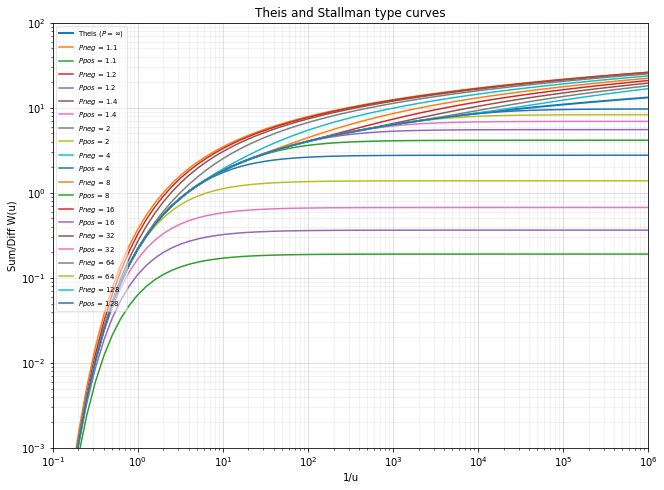

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expi
import math

def calc_ur(rr, S, T, t):
    """Calculate and return the dimensionless time parameter, u."""

    return rr**2 * S / 4 / T / t

def calc_ui(ri, S, T, t):
    """Calculate and return the dimensionless time parameter, u."""

    return ri**2 * S / 4 / T / t

def calc_ri(rr,P):
    """Calculate and return the dimensionless time parameter, u."""

    return P * rr
    
    
def W(u): return  -expi(-u)  # Theis
def calc_Wr(ur): return -expi(-ur)
def calc_Wi(ui): return -expi(-ui)

def stallman_drawdown_pos(t, S, T, Q, rr, P):
    """Calculate and return the drawdown s(u).

    S is the aquifer storage coefficient,
    T is the transmissivity (m2/s),
    r is the distance from the well (m), and
    Q is the pumping rate (m3/s).

    """

    ri = calc_ri(rr, P)
    ur = calc_ur(rr, S, T, t)
    ui = calc_ui(ri, S, T, t)
    Wr = calc_Wr(ur)
    Wi = calc_Wi(ui)
    
    s_pos = Q/4/np.pi/T * (Wr - Wi)
    return s_pos

def stallman_drawdown_neg(t, S, T, Q, rr, P):
    """Calculate and return the drawdown s(u).

    S is the aquifer storage coefficient,
    T is the transmissivity (m2/s),
    r is the distance from the well (m), and
    Q is the pumping rate (m3/s).

    """

    ri = calc_ri(rr, P)
    ur = calc_ur(rr, S, T, t)
    ui = calc_ui(ri, S, T, t)
    Wr = calc_Wr(ur)
    Wi = calc_Wi(ui)

    s_neg = Q/4/np.pi/T * (Wr + Wi)
    return s_neg


# Plot typecurves for different values of P

def cm2inch(value):
    return value/2.54

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)


Ps = [1.1, 1.2, 1.4, 2, 4, 8, 16, 32, 64, 128]

fig = plt.figure(figsize=(cm2inch(21), cm2inch(15)))

ax = fig.add_subplot(111)
set_size(cm2inch(21), cm2inch(15))
ax.set(xlabel='1/u', ylabel='Sum/Diff W(u)', xscale='log', yscale='log',
       xlim=(1e-1,1e6), ylim=(1e-3,1e2),
      title='Theis and Stallman type curves')

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ur = np.logspace(-7, 1, 81)
ax.plot(1/ur, W(ur), label='Theis ($P = \infty$)', linewidth=2)


for P in Ps:
    ur = np.logspace(-7, 1, 81)
    ui = ur * P*P
    Wr = calc_Wr(ur)
    Wi = calc_Wi(ui)
    SW = Wr + Wi
    DW = Wr - Wi
    label_pos = r"$Ppos$ = {:g}".format(P)
    label_neg = r"$Pneg$ = {:g}".format(P)
    ax.plot(1/ur, SW, label=label_neg)
    ax.plot(1/ur, DW, label=label_pos)
ax.legend(loc=2, framealpha=0.5, fontsize='x-small')

plt.show()

For better readability, we can also separate the type curves for positive and negative boundaries in different plots:

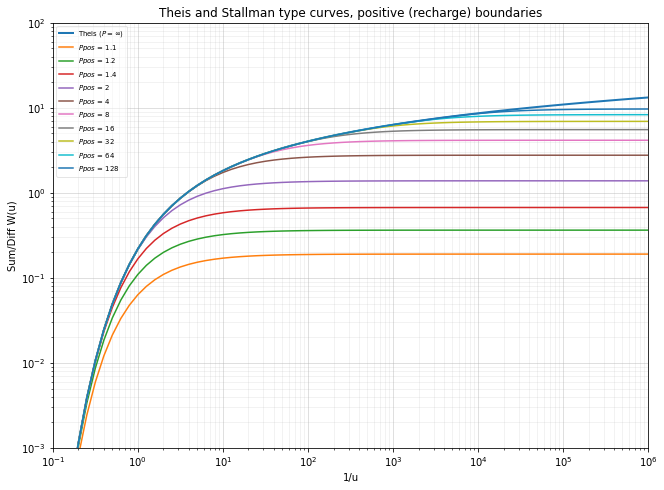

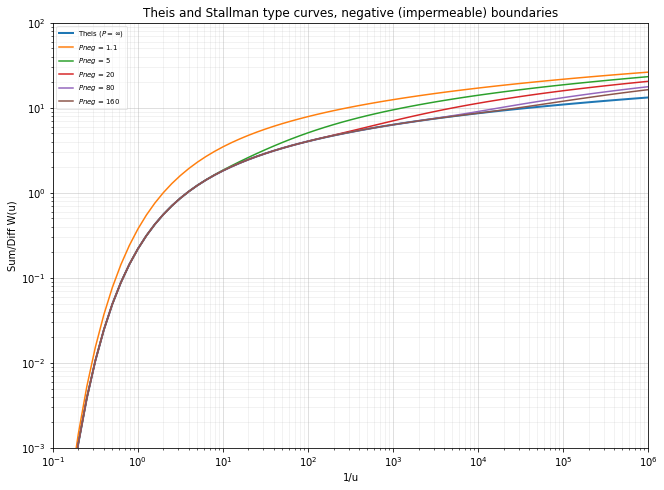

In [2]:
# Plot typecurves for different values of P

def cm2inch(value):
    return value/2.54

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

# postive boundaries
Ps = [1.1, 1.2, 1.4, 2, 4, 8, 16, 32, 64, 128]

fig = plt.figure(figsize=(cm2inch(21), cm2inch(15)))

ax = fig.add_subplot(111)
set_size(cm2inch(21), cm2inch(15))
ax.set(xlabel='1/u', ylabel='Sum/Diff W(u)', xscale='log', yscale='log',
       xlim=(1e-1,1e6), ylim=(1e-3,1e2),
      title='Theis and Stallman type curves, positive (recharge) boundaries')

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ur = np.logspace(-7, 1, 81)
ax.plot(1/ur, W(ur), label='Theis ($P = \infty$)', linewidth=2)


for P in Ps:
    ur = np.logspace(-7, 1, 81)
    ui = ur * P*P
    Wr = calc_Wr(ur)
    Wi = calc_Wi(ui)
    DW = Wr - Wi
    label_pos = r"$Ppos$ = {:g}".format(P)
    ax.plot(1/ur, DW, label=label_pos)
ax.legend(loc=2, framealpha=0.5, fontsize='x-small')

plt.show()

#negative boundaries

Ps = [1.1, 5, 20, 80, 160]

fig = plt.figure(figsize=(cm2inch(21), cm2inch(15)))

ax = fig.add_subplot(111)
set_size(cm2inch(21), cm2inch(15))
ax.set(xlabel='1/u', ylabel='Sum/Diff W(u)', xscale='log', yscale='log',
       xlim=(1e-1,1e6), ylim=(1e-3,1e2),
      title='Theis and Stallman type curves, negative (impermeable) boundaries')

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ur = np.logspace(-7, 1, 81)
ax.plot(1/ur, W(ur), label='Theis ($P = \infty$)', linewidth=2)


for P in Ps:
    ur = np.logspace(-7, 1, 81)
    ui = ur * P*P
    Wr = calc_Wr(ur)
    Wi = calc_Wi(ui)
    SW = Wr + Wi
    label_neg = r"$Pneg$ = {:g}".format(P)
    ax.plot(1/ur, SW, label=label_neg)
ax.legend(loc=2, framealpha=0.5, fontsize='x-small')

plt.show()

You can see, that for negative boundaries, the type curves are very close to each other, which makes a graphical evaluation very difficult.

Let's simulate a curve for $s(t)$ for a fixed distance from the well, $r = 10\;\mathrm{m}$, and pumping rate $Q = 0.002\;\mathrm{m^3/s}$ for a well with parameters $S = 0.001$ and $T = 0.001\;\mathrm{m^2/s}$. We assume that we have a positive or recharge boundary, and $P = 5$.

We'll add a bit of synthetic normally-distributed noise to get some realistic data simulating measurement errors (since the noise is random, slightly different values will be produced each time you run the code).

In [3]:
Q = 0.01       # Pumping rate from well (m3/s)
r = 10          # Distance from well (m)
S, T = 0.001, 0.001  # Storage Coefficient (-) and Transmissivity (m2/s)
P = 5   # postive boundary condition with P value

# Time grid, seconds
t = np.array([150, 200, 300, 400,  600,  800,  1000,  1400,  1800, 2400, 3200, 4800, 6000, 8000, 10000, 20000, 30000])

# Calculate drawdown
rr = r
s = stallman_drawdown_pos(t, S, T, Q, rr, P)

# Add some noise
noise_sd = 2.e-3
s += s * noise_sd * np.random.randn(s.shape[0])
print(s)

[1.09107799 1.27998787 1.55272464 1.72753858 1.93983663 2.07231429
 2.15648245 2.24906137 2.31766136 2.37325626 2.42601783 2.46483598
 2.48110219 2.51165001 2.51805982 2.53298073 2.55013288]


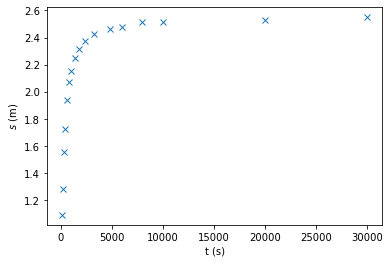

In [4]:
# Plot the generated data

s = s.reshape(17,) # change for different numbers of time steps
plt.plot(t, s, 'x')
plt.xlabel("t (s)")
plt.ylabel("$s$ (m)")
plt.show()

## Fitting the data

### Nonlinear least squares fit

The full Theis or Stallman equation can only be fit with a nonlinear routine such as [`scipy.optimize.curve_fit`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.curve_fit.html) or [`scipy.optimize import leastsq`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.leastsq.html). `curve_fit` can fit a function directly; it calls `leastsq` which minimizes the sum of squares of a set of equations: in this context, the residuals between the observed data and modelled $s(t)$.

`curve_fit` does not need an initial guess for the fit parameters (it sets them equal to 1 if none is provided, which may or may not be appropriate depending on the function). The function to be fit must take the independent variable as its first argument (here, $t$) and the parameters to be fit as the remaining arguments. Since we don't want to fit $Q$ and $r$, we'll define a wrapper function to pick them up in global scope and send them to `stallman_drawdown` which requires them.

S = 9.991e-04
T = 9.995e-04 m2/s
rms residual = 0.017454933404901528


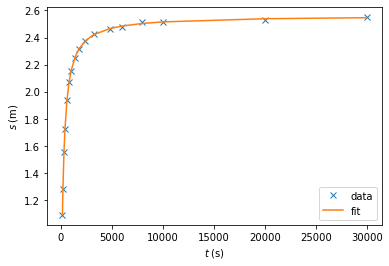

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expi
import math 
from math import inf
from math import exp
from scipy.integrate import quad
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')

def stallman_func_pos(t, S, T):
    return stallman_drawdown_pos(t, S, T, Q, rr, P)

# We use the P for our generated values above
P = 5
rr = r

popt, pcov = curve_fit(stallman_func_pos, t, s)
Sfit, Tfit = popt
print('S = %.3e' %Sfit)
print('T = %.3e m2/s' %Tfit)
stallman_fit = stallman_drawdown_pos(t, Sfit, Tfit, Q, rr, P)
rms_resid = np.sqrt(np.sum((s - stallman_fit)**2))
print('rms residual =', rms_resid)

plt.plot(t, s, 'x', label='data')
plt.plot(t, stallman_fit, label='fit')
plt.xlabel(r'$t\;\mathrm{(s)}$')
plt.ylabel(r'$s\;\mathrm{(m)}$')
plt.legend(loc=4)
plt.show()


We see a very good fit with $S$ and $T$ being nearly the exact values we used for the generation of the data.

#### Analysing a real world pumping test in a bounded aquifer

If we want to analyse a real world test, we must replace the synthetic data values we created above with the real values, along with the correct pumping rate $Q$ and distance to pumping well $r$. Morover, since we do not know the value of $P$, we have to check different P values. We first repeat the curve fit from above, assuming the values for $s$ and $t$ were measured values, and we did not know $P$.

Test fit for P = 1.10:
S = 3.056e-04
T = 6.013e-05 m2/s
rms residual = 0.16379562710937687
Test fit for P = 1.20:
S = 5.353e-04
T = 1.150e-04 m2/s
rms residual = 0.16214021029162018
Test fit for P = 1.40:
S = 8.433e-04
T = 2.121e-04 m2/s
rms residual = 0.15667447326913167
Test fit for P = 2.00:
S = 1.194e-03
T = 4.359e-04 m2/s
rms residual = 0.13188156881819926
Test fit for P = 4.00:
S = 1.111e-03
T = 8.641e-04 m2/s
rms residual = 0.041565261392032114
Test fit for P = 8.00:
S = 7.412e-04
T = 1.281e-03 m2/s
rms residual = 0.09791916287155075
Test fit for P = 16.00:
S = 4.202e-04
T = 1.686e-03 m2/s
rms residual = 0.24432420963542767
Test fit for P = 32.00:
S = 2.158e-04
T = 2.082e-03 m2/s
rms residual = 0.3839205064865262
Test fit for P = 64.00:
S = 1.049e-04
T = 2.465e-03 m2/s
rms residual = 0.5075984546031244
Test fit for P = 128.00:
S = 5.043e-05
T = 2.828e-03 m2/s
rms residual = 0.6136847712316995
Result of curve fitting:
Best fit for P = 4.00, S = 1.111e-03, T = 8.641e-04 m2/s


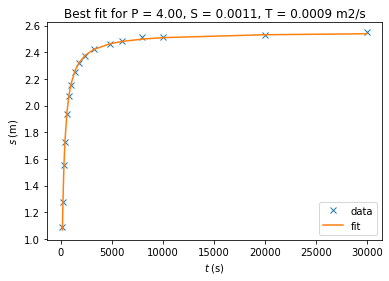

In [7]:
Ps = np.array([1.1, 1.2, 1.4, 2, 4, 8, 16, 32, 64, 128]) # Define values for P to be checked

best_rms = 1000 # set to high initial value
best_S = 0
best_T = 0

for P in Ps:
     
     print("Test fit for P = %.2f:" %P)
     popt, pcov = curve_fit(stallman_func_pos, t, s)
     Sfit, Tfit = popt
     print('S = %.3e' %Sfit)
     print('T = %.3e m2/s' %Tfit)
     stallman_fit = stallman_drawdown_pos(t, Sfit, Tfit, Q, rr, P)
     rms_resid = np.sqrt(np.sum((s - stallman_fit)**2))
     print('rms residual =', rms_resid)
     
     if rms_resid < best_rms:
         best_rms = rms_resid
         best_P = P
         best_S = Sfit
         best_T = Tfit
         best_stallman_fit = stallman_fit
 
print('Result of curve fitting:')
print('Best fit for P = %.2f, S = %.3e, T = %.3e m2/s' %(best_P, best_S, best_T))

plt.plot(t, s, 'x', label='data')
plt.plot(t, best_stallman_fit, label='fit')
plt.xlabel(r'$t\;\mathrm{(s)}$')
plt.ylabel(r'$s\;\mathrm{(m)}$')
plt.legend(loc=4)
plt.title('Best fit for P = %.2f, S = %.4f, T = %.4f m2/s' %(best_P, best_S, best_T))
plt.show()


The best fit should result for $P$ of 4 or 8 (depending on the random noise that was added above). The fit seems not so bad, and if it was a real pumping test, we could just stop here. But since we know the exact value, we can repeat the fit with a finer range of P values, and see what happens:

Test fit for P = 4.00:
S = 1.111e-03
T = 8.641e-04 m2/s
rms residual = 0.041565261392032114
Test fit for P = 5.00:
S = 9.991e-04
T = 9.995e-04 m2/s
rms residual = 0.017454933404901528
Test fit for P = 6.00:
S = 8.992e-04
T = 1.109e-03 m2/s
rms residual = 0.0412868579279791
Test fit for P = 7.00:
S = 8.138e-04
T = 1.201e-03 m2/s
rms residual = 0.07079876190608124
Test fit for P = 8.00:
S = 7.412e-04
T = 1.281e-03 m2/s
rms residual = 0.09791916287155075
Result of curve fitting:
Best fit for P = 5.00, S = 0.0010, T = 0.0010 m2/s


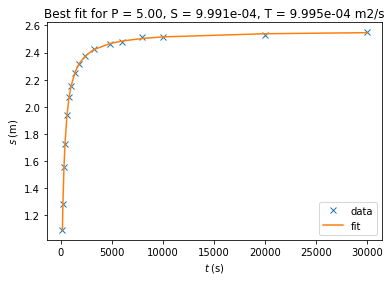

In [9]:
Ps = np.array([4,5,6,7,8]) # Define values for P to be checked

best_rms = 1000 # set to high initial value
best_S = 0
best_T = 0

for P in Ps:
    
     print("Test fit for P = %.2f:" %P)
     popt, pcov = curve_fit(stallman_func_pos, t, s)
     Sfit, Tfit = popt
     print('S = %.3e' %Sfit)
     print('T = %.3e m2/s' %Tfit)
     stallman_fit = stallman_drawdown_pos(t, Sfit, Tfit, Q, rr, P)
     rms_resid = np.sqrt(np.sum((s - stallman_fit)**2))
     print('rms residual =', rms_resid)
     
     if rms_resid < best_rms:
         best_rms = rms_resid
         best_P = P
         best_S = Sfit
         best_T = Tfit
         best_stallman_fit = stallman_fit
 
print('Result of curve fitting:')
print('Best fit for P = %.2f, S = %.4f, T = %.4f m2/s' %(best_P, best_S, best_T))

plt.plot(t, s, 'x', label='data')
plt.plot(t, best_stallman_fit, label='fit')
plt.xlabel(r'$t\;\mathrm{(s)}$')
plt.ylabel(r'$s\;\mathrm{(m)}$')
plt.legend(loc=4)
plt.title('Best fit for P = %.2f, S = %.3e, T = %.3e m2/s' %(best_P, best_S, best_T))
plt.show()


We now see the best fit for $P = 5$ which is indeed exactly the value we used for the generation of the data.

We then repeat the curve fit with the values from the excercise: $Q$ = 6 L/s, $r$ = 40 m and the measured values for $t$ and $s$:

In [28]:
Q = 0.006       # Pumping rate from well (m3/s)
r = 40          # Distance from well (m)

t = np.array([10,18,32,56,100,178,316,562,1000,1778,3162,5623,10000,17780,31620,56230,100000,200000])
s = np.array([0.005,0.02,0.05,0.09,0.16,0.23,0.31,0.4,0.49,0.58,0.67,0.75,0.82,0.87,0.9,0.92, 0.93, 0.93])



We use the same curve fit from above again:

Test fit for P = 1.10:
S = 3.056e-04
T = 6.013e-05 m2/s
rms residual = 0.16379562710937687
Test fit for P = 1.20:
S = 5.353e-04
T = 1.150e-04 m2/s
rms residual = 0.16214021029162018
Test fit for P = 1.40:
S = 8.433e-04
T = 2.121e-04 m2/s
rms residual = 0.15667447326913167
Test fit for P = 2.00:
S = 1.194e-03
T = 4.359e-04 m2/s
rms residual = 0.13188156881819926
Test fit for P = 4.00:
S = 1.111e-03
T = 8.641e-04 m2/s
rms residual = 0.041565261392032114
Test fit for P = 8.00:
S = 7.412e-04
T = 1.281e-03 m2/s
rms residual = 0.09791916287155075
Test fit for P = 16.00:
S = 4.202e-04
T = 1.686e-03 m2/s
rms residual = 0.24432420963542767
Test fit for P = 32.00:
S = 2.158e-04
T = 2.082e-03 m2/s
rms residual = 0.3839205064865262
Test fit for P = 64.00:
S = 1.049e-04
T = 2.465e-03 m2/s
rms residual = 0.5075984546031244
Test fit for P = 128.00:
S = 5.043e-05
T = 2.828e-03 m2/s
rms residual = 0.6136847712316995
Result of curve fitting:
Best fit for P = 4.00, S = 0.0011, T = 0.0009 m2/s


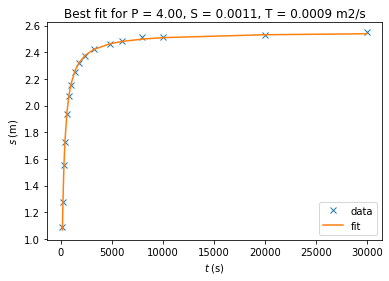

In [10]:
Ps = np.array([1.1, 1.2, 1.4, 2, 4, 8, 16, 32, 64, 128]) # Define values for P to be checked

best_rms = 1000 # set to high initial value
best_S = 0
best_T = 0

for P in Ps:
     
     print("Test fit for P = %.2f:" %P)
     popt, pcov = curve_fit(stallman_func_pos, t, s)
     Sfit, Tfit = popt
     print('S = %.3e' %Sfit)
     print('T = %.3e m2/s' %Tfit)
     stallman_fit = stallman_drawdown_pos(t, Sfit, Tfit, Q, rr, P)
     rms_resid = np.sqrt(np.sum((s - stallman_fit)**2))
     print('rms residual =', rms_resid)
     
     if rms_resid < best_rms:
         best_rms = rms_resid
         best_P = P
         best_S = Sfit
         best_T = Tfit
         best_stallman_fit = stallman_fit
 
print('Result of curve fitting:')
print('Best fit for P = %.2f, S = %.4f, T = %.4f m2/s' %(best_P, best_S, best_T))

plt.plot(t, s, 'x', label='data')
plt.plot(t, best_stallman_fit, label='fit')
plt.xlabel(r'$t\;\mathrm{(s)}$')
plt.ylabel(r'$s\;\mathrm{(m)}$')
plt.legend(loc=4)
plt.title('Best fit for P = %.2f, S = %.3e, T = %.3e m2/s' %(best_P, best_S, best_T))
plt.show()


We see that the fit is quite OK. However we could probably achieve a more exact result with a finer range of P values. Since the errors were lowest for 16 an 32, we check some more values within this range:

Test fit for P = 14.00:
S = 4.731e-04
T = 1.609e-03 m2/s
rms residual = 0.21615701934360645
Test fit for P = 15.00:
S = 4.452e-04
T = 1.649e-03 m2/s
rms residual = 0.23074149990637743
Test fit for P = 16.00:
S = 4.202e-04
T = 1.686e-03 m2/s
rms residual = 0.24432420963542767
Test fit for P = 17.00:
S = 3.977e-04
T = 1.721e-03 m2/s
rms residual = 0.25701904056306596
Test fit for P = 18.00:
S = 3.774e-04
T = 1.754e-03 m2/s
rms residual = 0.2689226572362251
Test fit for P = 19.00:
S = 3.589e-04
T = 1.785e-03 m2/s
rms residual = 0.2801176199222552
Test fit for P = 20.00:
S = 3.420e-04
T = 1.815e-03 m2/s
rms residual = 0.2906748760720349
Test fit for P = 21.00:
S = 3.265e-04
T = 1.843e-03 m2/s
rms residual = 0.3006557526327078
Test fit for P = 22.00:
S = 3.123e-04
T = 1.869e-03 m2/s
rms residual = 0.31011355642191824
Test fit for P = 23.00:
S = 2.993e-04
T = 1.895e-03 m2/s
rms residual = 0.31909486680973753
Test fit for P = 24.00:
S = 2.872e-04
T = 1.919e-03 m2/s
rms residual = 0.3276405861

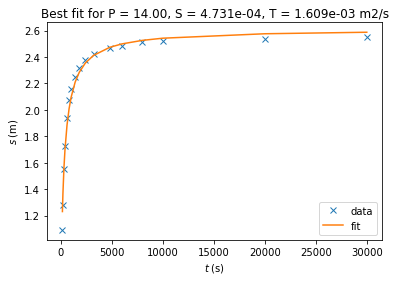

In [11]:
P = np.array([14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]) # Define values for P to be checked

best_rms = 1000 # set to high initial value
best_S = 0
best_T = 0

for x in P:
     P = x
     print("Test fit for P = %.2f:" %P)
     popt, pcov = curve_fit(stallman_func_pos, t, s)
     Sfit, Tfit = popt
     print('S = %.3e' %Sfit)
     print('T = %.3e m2/s' %Tfit)
     stallman_fit = stallman_drawdown_pos(t, Sfit, Tfit, Q, rr, P)
     rms_resid = np.sqrt(np.sum((s - stallman_fit)**2))
     print('rms residual =', rms_resid)
     
     if rms_resid < best_rms:
         best_rms = rms_resid
         best_P = P
         best_S = Sfit
         best_T = Tfit
         best_stallman_fit = stallman_fit
 
print('Result of curve fitting:')
print('Best fit for P = %.2f, S = %.4f, T = %.4f m2/s' %(best_P, best_S, best_T))

plt.plot(t, s, 'x', label='data')
plt.plot(t, best_stallman_fit, label='fit')
plt.xlabel(r'$t\;\mathrm{(s)}$')
plt.ylabel(r'$s\;\mathrm{(m)}$')
plt.legend(loc=4)
plt.title('Best fit for P = %.2f, S = %.3e, T = %.3e m2/s' %(best_P, best_S, best_T))
plt.show()


We now see the best fit for $P = 19$ and also some minor changes for $T$ and $S$. We could now iteratively test even more P-values (the results above suggest between 18 and 20), but in practice, the achieved values are more than good enough.